In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ExploreDf = pd.DataFrame()
ExploreDf = pd.read_csv('Paper33SupData/features_2week_1_all.csv')
print(ExploreDf)


     id     SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   u00  2.329154e-05   2.505256e-07     229.987882          5.274546   
1   u01  6.054921e-07   2.877519e-11       2.566260        -11.383360   
2   u02  1.615362e-06   1.920707e-09       6.686956         -6.973576   
3   u03  3.545538e-07   8.135541e-11       0.824013        -11.517559   
4   u04  1.389936e-06   6.292272e-10      27.183983         -3.618104   
5   u05  7.993447e-07   1.376761e-10       5.184300         -4.759810   
6   u07  5.926940e-07   3.656015e-11      26.565523         -1.906466   
7   u08  5.562702e-07   1.972275e-11       4.488032         -7.619410   
8   u09  7.646657e-07   3.040105e-11       9.662998         -4.076226   
9   u10  5.302156e-07   2.703248e-11       2.176755        -12.302372   
10  u12  7.598654e-06   5.797482e-09      51.149978         -0.451367   
11  u13  2.434079e-06   2.907508e-10      11.680799         -7.024697   
12  u14  5.455124e-07   1.866984e-11       5.338019

In [3]:
print(ExploreDf.keys())

Index(['id', 'SpeedMean', 'SpeedVariance', 'TotalDistance', 'LocationVariance',
       'CircadianMovement', 'NumberofClusters', 'Entropy', 'NormalizedEntropy',
       'ContinuousEntropy', 'HomeStay', 'TransitionTime'],
      dtype='object')


In [4]:
PHQ9Df = pd.DataFrame()
PHQ9Df = pd.read_csv('Paper33SupData/phq9_followup.csv')
print(PHQ9Df)

     id  PHQ9
0   u00     3
1   u01     4
2   u02     5
3   u03     4
4   u04     8
5   u05     0
6   u07     8
7   u09     2
8   u10     4
9   u14     3
10  u15     1
11  u16    12
12  u17    18
13  u18    12
14  u19     4
15  u20     8
16  u23    21
17  u24     7
18  u27     7
19  u30     0
20  u31     5
21  u32     2
22  u33    25
23  u34     6
24  u35     7
25  u36     1
26  u42     0
27  u43     4
28  u44     2
29  u45     2
30  u47     1
31  u49     8
32  u51     0
33  u52    15
34  u53    11
35  u56     3
36  u58     8
37  u59     7


In [5]:
print(PHQ9Df.keys())

Index(['id', 'PHQ9'], dtype='object')


In [6]:
PHQ9BaseDf = pd.DataFrame()
PHQ9BaseDf = pd.read_csv('Paper33SupData/phq9_baseline.csv')
PHQ9BaseDf.rename(columns={'PHQ9': 'PHQ9Base'}, inplace=True)
print(PHQ9BaseDf)

     id  PHQ9Base
0   u00         2
1   u01         5
2   u02        13
3   u03         2
4   u04         6
5   u05         2
6   u07         7
7   u08         5
8   u09         4
9   u10         0
10  u12         1
11  u13         4
12  u14         1
13  u15         3
14  u16         6
15  u17        13
16  u18        15
17  u19         5
18  u20         8
19  u22         3
20  u23        11
21  u24         5
22  u27         5
23  u30         1
24  u31        12
25  u32         4
26  u33        23
27  u34         3
28  u35         7
29  u36         2
30  u39         3
31  u42         1
32  u43         7
33  u44         1
34  u45         7
35  u46        10
36  u47         5
37  u49         2
38  u50         7
39  u51         1
40  u52        12
41  u53         8
42  u56         2
43  u57         0
44  u58         5
45  u59         5


In [7]:
initialMerge = pd.merge(ExploreDf, PHQ9Df, on='id')
merged_df = pd.merge(initialMerge, PHQ9BaseDf, on='id')
print(merged_df)


     id     SpeedMean  SpeedVariance  TotalDistance  LocationVariance  \
0   u00  2.329154e-05   2.505256e-07     229.987882          5.274546   
1   u01  6.054921e-07   2.877519e-11       2.566260        -11.383360   
2   u02  1.615362e-06   1.920707e-09       6.686956         -6.973576   
3   u03  3.545538e-07   8.135541e-11       0.824013        -11.517559   
4   u04  1.389936e-06   6.292272e-10      27.183983         -3.618104   
5   u05  7.993447e-07   1.376761e-10       5.184300         -4.759810   
6   u07  5.926940e-07   3.656015e-11      26.565523         -1.906466   
7   u09  7.646657e-07   3.040105e-11       9.662998         -4.076226   
8   u10  5.302156e-07   2.703248e-11       2.176755        -12.302372   
9   u14  5.455124e-07   1.866984e-11       5.338019         -2.688427   
10  u15  7.962274e-07   6.297755e-11      13.623527         -1.093077   
11  u16  4.431602e-07   1.537332e-11       2.274338        -11.390213   
12  u17  3.481990e-07   1.148690e-11       1.465940

In [8]:
merged_df = merged_df.drop(columns=['id'])

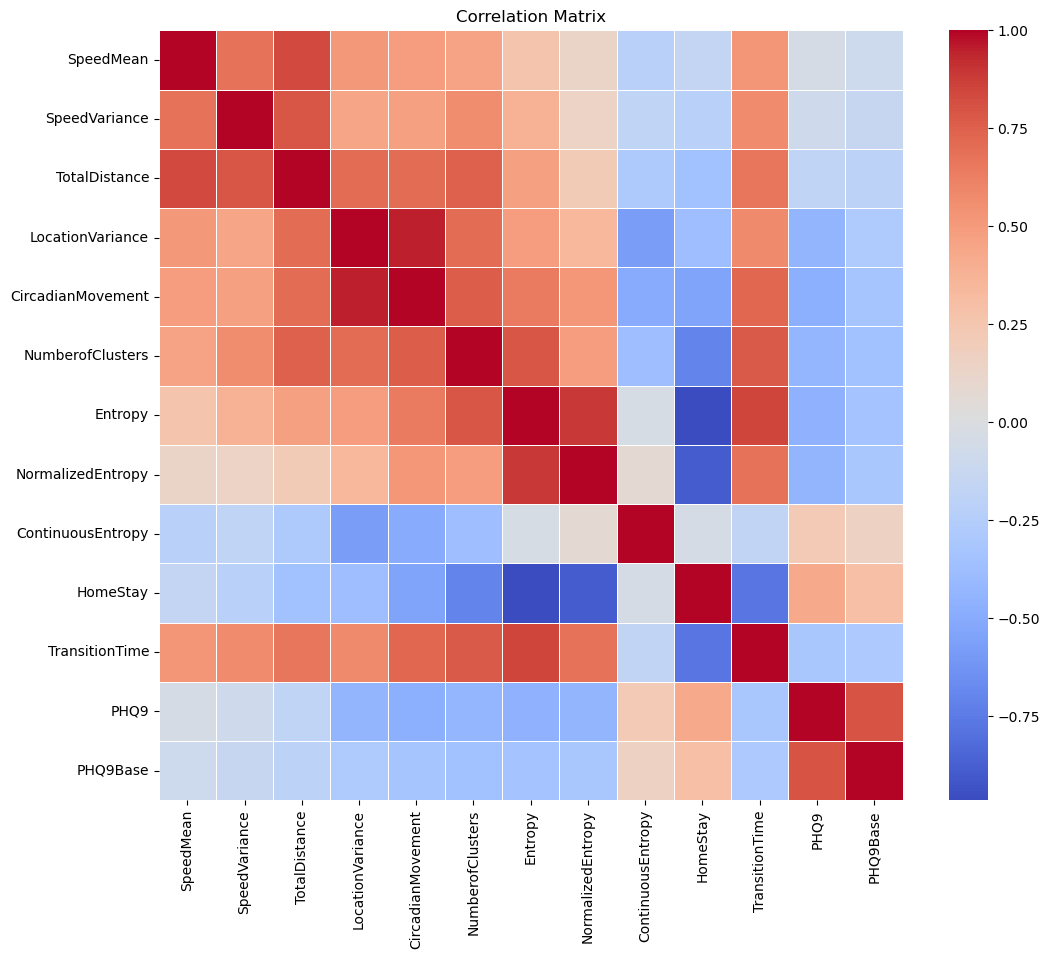

In [9]:
correlation_matrix = merged_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

plt.show()

# Machine Learning Models:


In [19]:
# first create classes for phq 9
print(merged_df['PHQ9'])

0      3
1      4
2      5
3      0
4      2
5      4
6      3
7     12
8     18
9     12
10     4
11     7
12     0
13     5
14     7
15     1
16     4
17     2
18     2
19     1
20     8
21     0
22    15
23    11
24     3
25     8
26     7
Name: PHQ9, dtype: int64


## Logistic Regression 

## Support Vector Machine (SVM)

## Random Forest 

## XGBoost